In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('C:\\Users\\LOKESHRAJ K P\\Downloads\\uber\\rideshare_kaggle.csv')

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
pd.reset_option("max_columns")

In [6]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [10]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [12]:
#check the correlation of  temperature related features with target feature (Price)
temp_cols= ['temperature','apparentTemperature','temperatureHigh',
       'temperatureHighTime', 'temperatureLow','temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon','temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax','apparentTemperatureMaxTime','price']


In [13]:
temp_cols

['temperature',
 'apparentTemperature',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'icon',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'price']

In [14]:
df_temp =df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
0,42.34,37.12,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,5.0
1,43.58,37.35,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,11.0
2,38.33,32.93,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,7.0
3,34.38,29.63,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,26.0
4,37.44,30.88,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,9.0


C:\Users\LOKESHRAJ K P\AppData\Local\Temp\ipykernel_16888\3998235029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_temp.corr(),annot=True)


<Axes: >

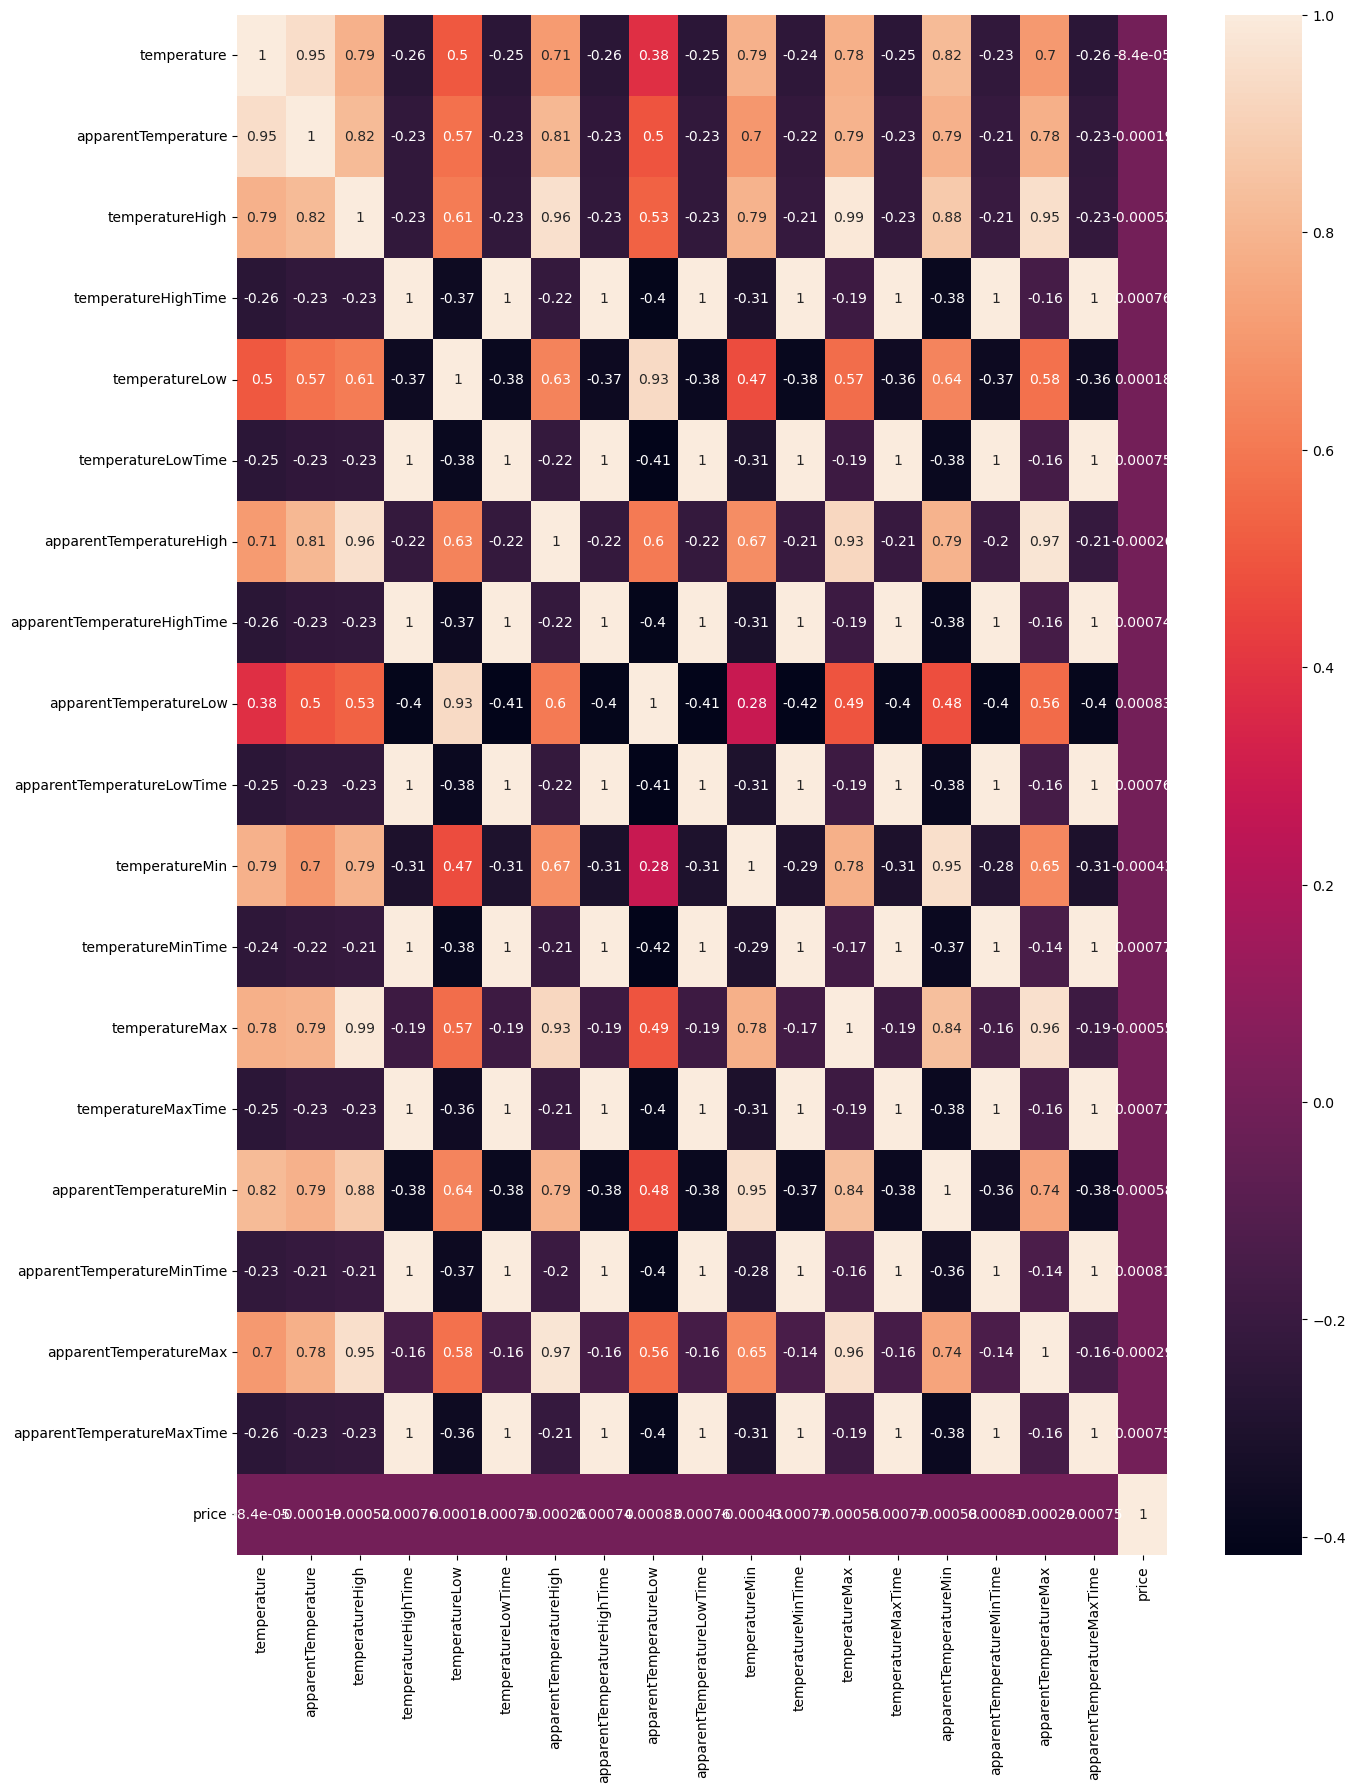

In [15]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

In [16]:
# Temperature features not have much impact on price & remove them
df_temp=df_temp.drop('price',axis=1)

In [17]:
df=df.drop(df_temp,axis=1)

In [18]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime'],
      dtype='object')

In [19]:
## check other climatic feaure coorelation with price
df_climate=['precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime','price']

In [20]:
df_climate=df[df_climate]
df_climate.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,price
0,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,5.0
1,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,11.0
2,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,7.0
3,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,26.0
4,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,9.0


<Axes: >

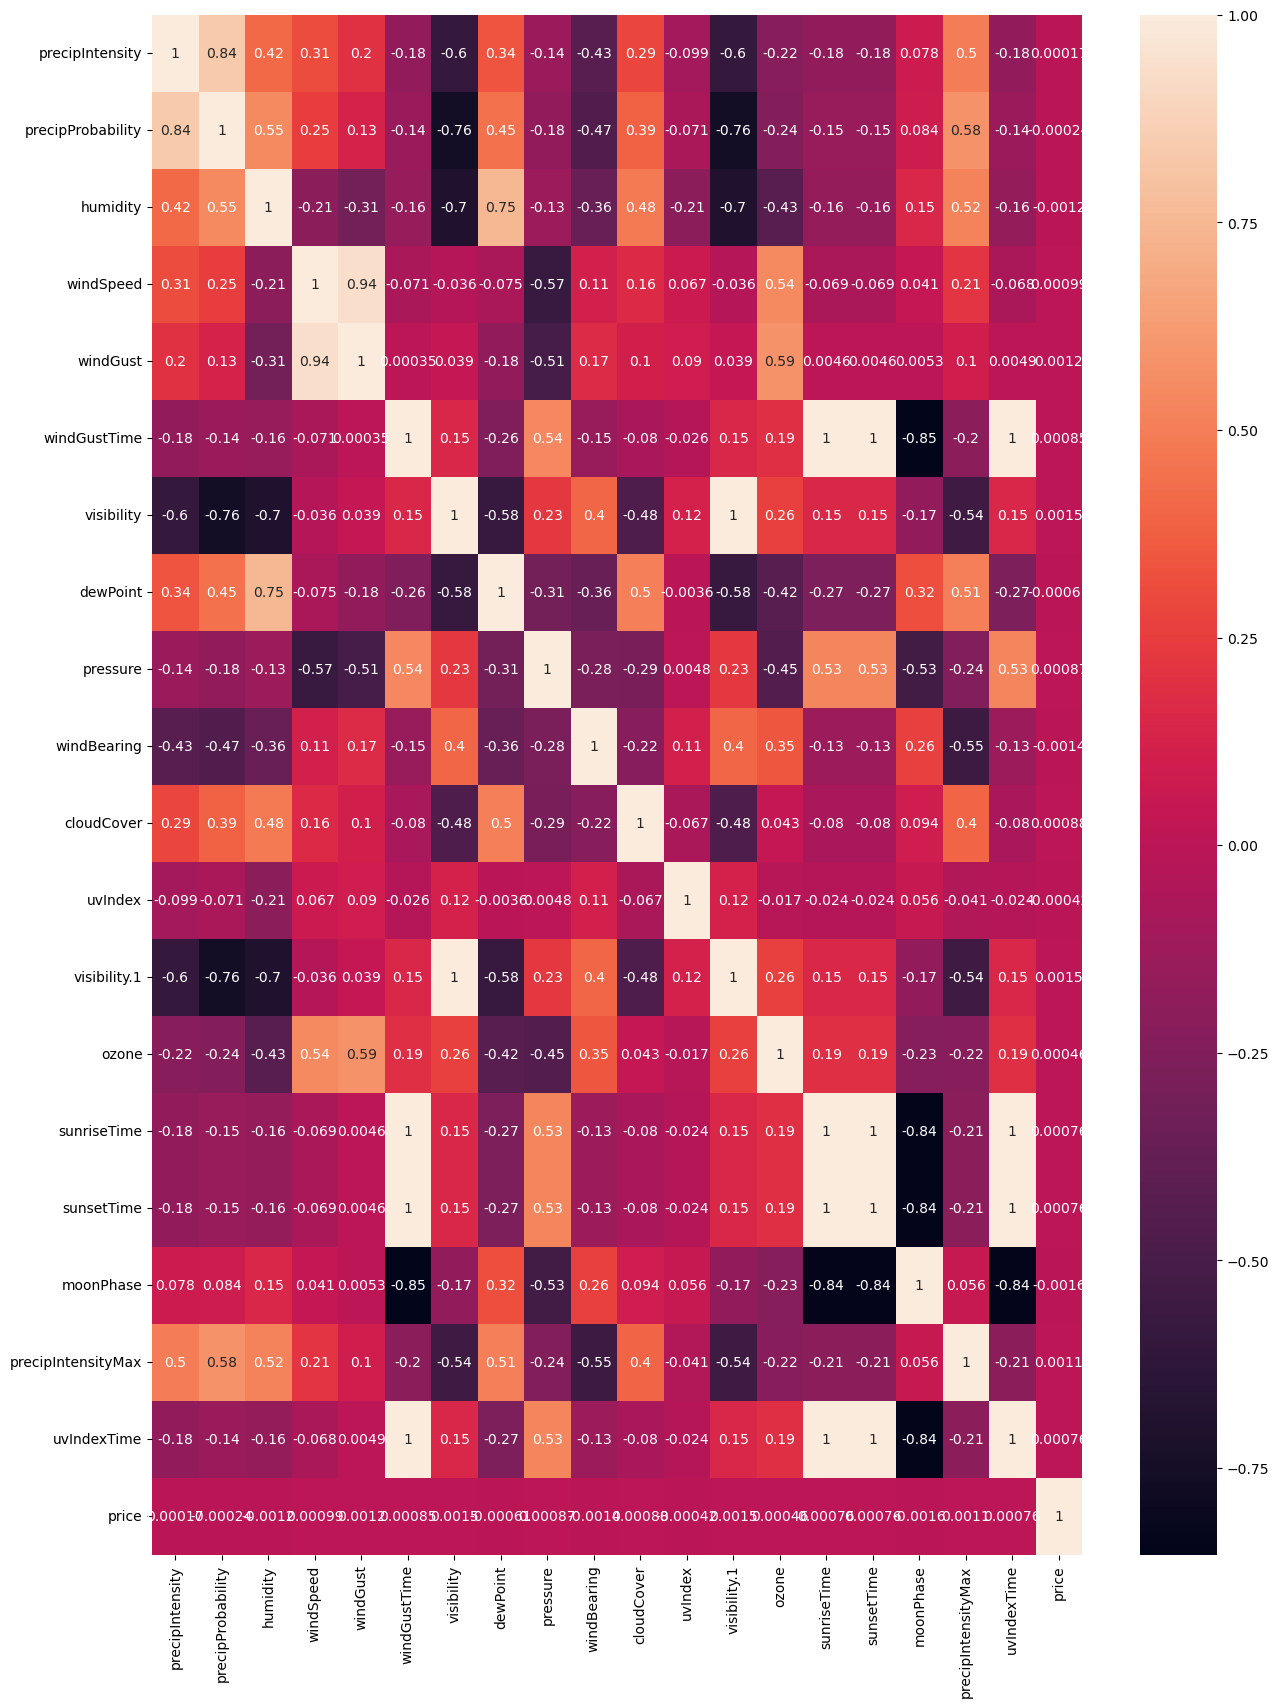

In [21]:
plt.figure(figsize=(15,20))
sns.heatmap(df_climate.corr(),annot=True)

In [22]:
# climate features not have much impact on price & remove them
df_climate=df_climate.drop('price',axis=1)

In [23]:
df=df.drop(df_climate,axis=1)

In [24]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,"Rain until morning, starting again in the eve..."
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,Light rain in the morning.
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,Partly cloudy throughout the day.
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,Mostly cloudy throughout the day.


In [25]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'short_summary', 'long_summary'],
      dtype='object')

In [26]:
df= df.drop(['id','timestamp','timezone','product_id'],axis=1)

In [27]:
df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,"Rain until morning, starting again in the eve..."
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,Light rain in the morning.
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,Partly cloudy throughout the day.
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,Mostly cloudy throughout the day.


In [28]:
category_col=df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

long_summary : [' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning.

In [29]:
new_df= ['source',
 'destination',
 'cab_type',
 'name']

df_cat = df[new_df]
df_cat.head()

,source,destination,cab_type,name
0,Haymarket Square,North Station,Lyft,Shared
1,Haymarket Square,North Station,Lyft,Lux
2,Haymarket Square,North Station,Lyft,Lyft
3,Haymarket Square,North Station,Lyft,Lux Black XL
4,Haymarket Square,North Station,Lyft,Lyft XL


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [31]:
df_cat_encode

,source,destination,cab_type,name
0,5,7,0,7
1,5,7,0,2
2,5,7,0,5
3,5,7,0,4
4,5,7,0,6
...,...,...,...,...
693065,11,6,1,11
693066,11,6,1,10
693067,11,6,1,9
693069,11,6,1,1


<Axes: >

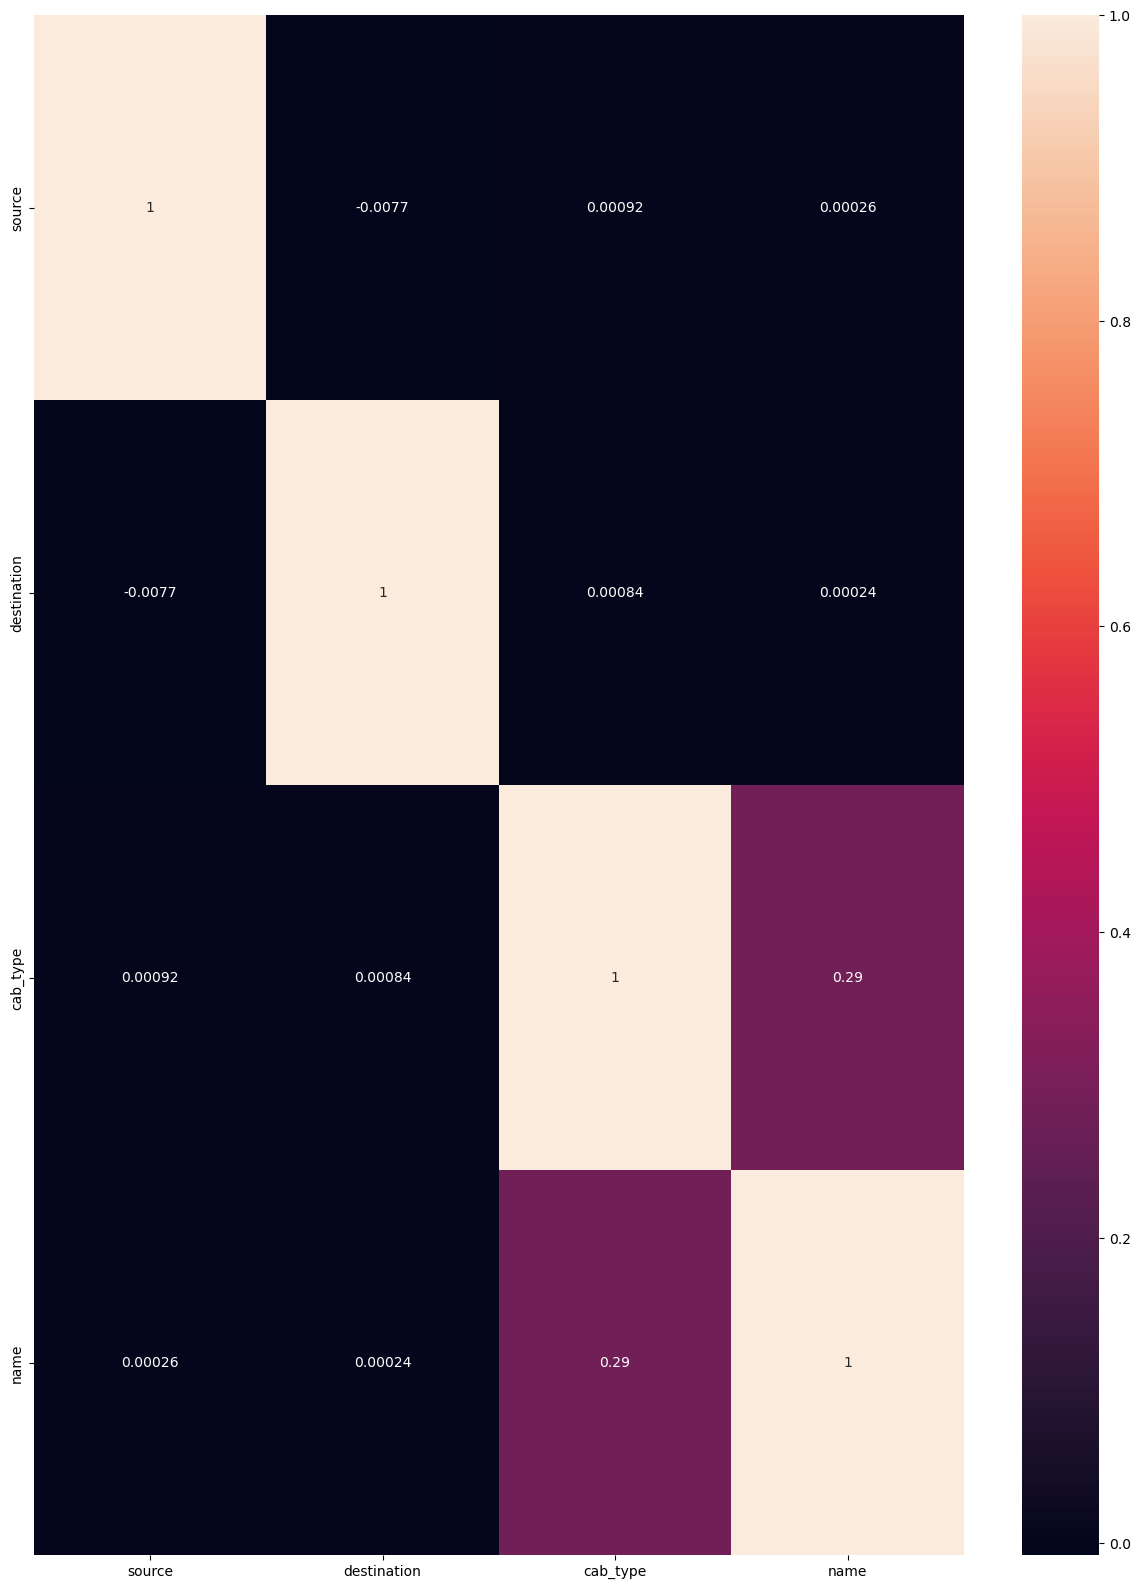

In [32]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

In [33]:
#Observation

#We can see only name feature that has a relatively strong correlation. Source,destination, and cab_type features have relatively weak correlation, but i will pick cab_type feature because it has stronger correlation than other two features. I will drop or remove the rest of the columns

In [34]:
df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,Rain throughout the day.
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,"Rain until morning, starting again in the eve..."
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,Light rain in the morning.
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,Partly cloudy throughout the day.
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,Mostly cloudy throughout the day.


In [35]:
df = df.drop(['datetime','hour','day','month','latitude','longitude','short_summary','long_summary'],axis=1)

In [36]:
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [37]:
#  Removing Outliers

## We're using IQR method for checking top and bottom outliers

Qp12 = df['price'].quantile(0.25)
Qp32 = df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [38]:
df[df['price']>(Qp32+(1.5*IQRp))]

,source,destination,cab_type,name,price,distance,surge_multiplier
706,South Station,Back Bay,Lyft,Lux Black,52.5,3.25,2.00
707,South Station,Back Bay,Lyft,Lux Black XL,67.5,3.25,2.00
769,Theatre District,Boston University,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Theatre District,Fenway,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Financial District,Boston University,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...,...,...
692439,Financial District,Boston University,Uber,Black SUV,47.0,5.56,1.00
692698,Financial District,Fenway,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Financial District,Boston University,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Back Bay,North End,Uber,Black SUV,51.0,7.36,1.00


In [39]:
df[df['price']<(Qp12-(1.5*IQRp))]

,source,destination,cab_type,name,price,distance,surge_multiplier


In [40]:
print('Size before removing :',df.shape)
df= df[~((df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',df.shape)

Size before removing : (637976, 7)
Size after removing : (632387, 7)


In [41]:
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [42]:
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source   destination                       
Back Bay Boston University        13.873539
         Fenway                   13.508119
         Haymarket Square         17.646293
         North End                18.972243
         Northeastern University  13.002950
...                                     ...
West End Fenway                   17.855988
         Haymarket Square         12.749418
         North End                13.360606
         Northeastern University  18.872943
         South Station            15.006588

[72 rows x 1 columns]

In [43]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(df[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [44]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
new_df=df_onehot

In [46]:
df_onehot.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 42.5


,source,destination,cab_type,name,price,distance,surge_multiplier
469,Boston University,Theatre District,Lyft,Lux Black XL,42.5,2.93,1.25
639,Financial District,Fenway,Lyft,Lux Black XL,42.5,3.80,1.00
705,South Station,Back Bay,Lyft,Lyft XL,42.5,3.25,2.50
910,Boston University,North Station,Lyft,Lux Black XL,42.5,3.42,1.00
981,Fenway,Financial District,Lyft,Lux Black XL,42.5,4.09,1.00
...,...,...,...,...,...,...,...
691930,Boston University,Financial District,Lyft,Lux Black XL,42.5,4.55,1.00
691956,Theatre District,Boston University,Lyft,Lux,42.5,3.07,2.00
692134,Financial District,Northeastern University,Lyft,Lux Black XL,42.5,4.47,1.00
692762,Theatre District,Fenway,Lyft,Lux Black XL,42.5,4.31,1.00


In [48]:
pd.set_option('display.max_columns', None)
new_df.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
new_df.columns

Index(['price', 'distance', 'surge_multiplier', 'source_Back Bay',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_W

In [50]:
X=new_df[['source_Back Bay',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']] 

In [51]:
X.head()

,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LOKESHRAJ K P\a

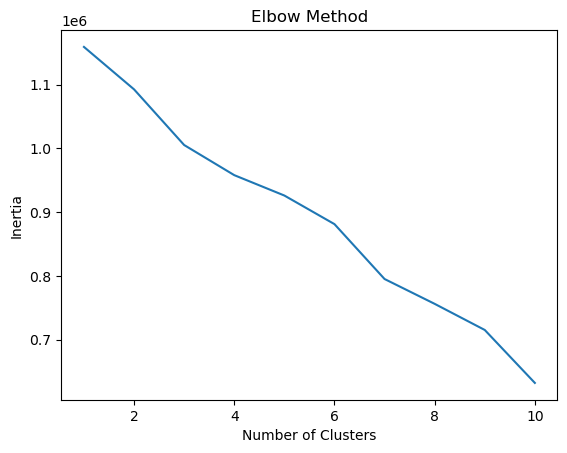

In [52]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [53]:
# Fit K-means with the chosen number of clusters
n_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
new_df['cluster_label'] = kmeans.labels_


C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
new_df['cluster_label']

0         1
1         1
2         1
3         1
4         1
         ..
693065    0
693066    0
693067    0
693069    0
693070    0
Name: cluster_label, Length: 632387, dtype: int32

In [57]:
new_df.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cluster_label
0,5.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,11.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,26.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,9.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df[['distance','surge_multiplier','cluster_label']],new_df['price'], test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)


In [61]:
y_pred

array([18.27922736, 13.91492898, 14.27925985, ..., 14.82657743,
       13.95090534, 22.12122735])

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1201986594822454

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

67.63974666872743
8.224338676679569
